In [6]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from stable_baselines3 import PPO

In [8]:
model = PPO.load('../best_model/ppo/CnnPolicy/best_model.zip')
X = np.load('../best_model/ppo/CnnPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([12, 1, 1, 10, 7])

In [13]:
len(X.shape)

5

In [14]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [15]:
x = torch.tensor(X[10])
ppo_net.forward(x)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[0.0074]], grad_fn=<AddmmBackward0>)

In [16]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X_sample)

Action made: ACTION_NOTHING


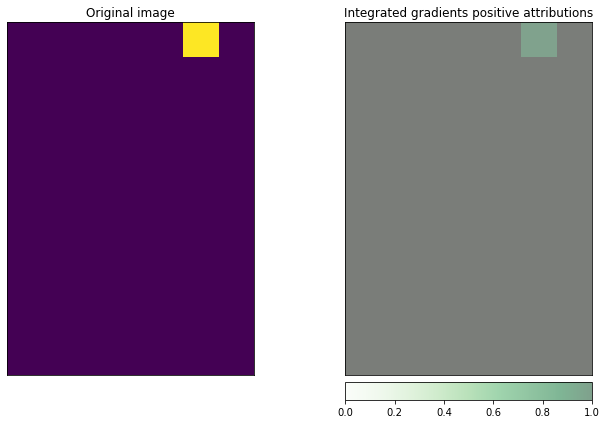

In [23]:
ig_attributor.explain_example(8)

In [24]:
X_manual = torch.Tensor([[[
    [[0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1]],
    # [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    # [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ]]])

In [25]:
X_manual.shape

torch.Size([1, 1, 1, 10, 7])

In [28]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='cnn',
                            agent='ppo',
                            data=X_manual)

Action made: ACTION_NOTHING


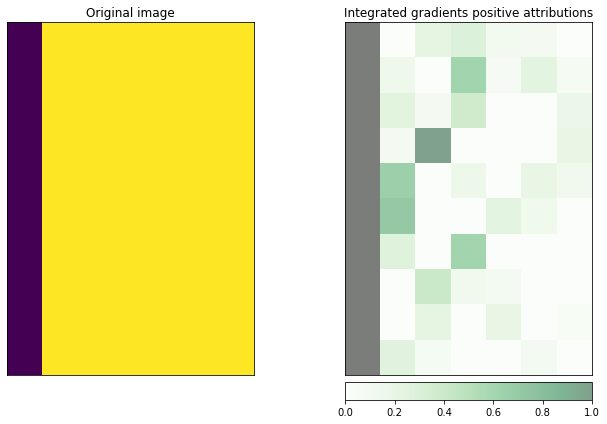

In [29]:
ig_attributor.explain_example(idx=0)